# Project 1 — Dataset Creation

The **goal** for this assignment is for you to create a usable dataset from an open-source data collection.

## Import Packages

In [202]:
import os
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Step 1: Load Data

The dataset for this project is a 2013 web scraping of Indian matrimonial listings. The dataset is a sample of ~18,000 posts from 24-27 year olds.

In [203]:
data = pd.read_csv(r'C:/Users/Kavya/Desktop/07  Advanced Data Analysis/data71200/matrimonial.csv')
df = pd.DataFrame(data)
df.head()

,poster,created_for,age_looking_avg,age_self_2013,body_self,brothers,complexion_self,drinking_self,diet_self,employed_self,...,income_self,marital_status_self,mother_occupation,religion_self,sisters,smoking_self,disability,status_self,values_self,weight_self
0,bride,Not Self,28.0,25,Average,1.0,Very Fair,No,Non Vegetarian,Not Working,...,80000.0,Never Married,Business/Entrepreneur,Hindu,1.0,No,False,High Class,Moderate,165.0
1,bride,Not Self,28.0,25,Slim,1.0,Fair,No,Non Vegetarian,Not Working,...,1365.0,Never Married,Housewife,Hindu,0.0,No,False,Middle Class,Moderate,90.0
2,bride,Self,27.0,24,Average,2.0,Wheatish,No,Vegetarian,Not Working,...,1365.0,Never Married,Housewife,Sikh,1.0,No,False,Middle Class,NaN,NaN
3,bride,Not Self,27.0,24,Average,1.0,Wheatish,No,Non Vegetarian,Not Working,...,13652.0,Never Married,Housewife,Hindu,0.0,No,False,Upper Middle Class,Moderate,90.0
4,bride,Not Self,29.0,25,Average,2.0,Very Fair,No,Non Vegetarian,Not Working,...,13652.0,Never Married,Housewife,Muslim,4.0,No,False,Middle Class,Moderate,90.0


## Step 2: Divide into a training and a testing set

In [204]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=44)

## Step 3: Explore your training set

In [205]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14359 entries, 13504 to 14100
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   poster               14359 non-null  object 
 1   created_for          14266 non-null  object 
 2   age_looking_avg      13805 non-null  float64
 3   age_self_2013        14359 non-null  int64  
 4   body_self            12627 non-null  object 
 5   brothers             6676 non-null   float64
 6   complexion_self      13035 non-null  object 
 7   drinking_self        12906 non-null  object 
 8   diet_self            12936 non-null  object 
 9   employed_self        13615 non-null  object 
 10  family_type          6511 non-null   object 
 11  father_occupation    5900 non-null   object 
 12  have_children        14359 non-null  object 
 13  height_self_in       14359 non-null  int64  
 14  income_self          9351 non-null   float64
 15  marital_status_self  14359 non-n

In [206]:
train_set.describe().apply(lambda s: s.apply('{0:.0f}'.format))

,age_looking_avg,age_self_2013,brothers,height_self_in,income_self,sisters,weight_self
count,13805,14359,6676,14359,9351,6676,3712
mean,25,25,1,66,7117,1,128
std,4,1,1,3,15255,1,24
min,18,24,0,58,546,0,13
25%,23,25,0,63,1366,0,110
50%,25,25,1,65,4094,1,128
75%,28,25,1,68,5462,1,143
max,75,27,10,84,400000,10,390


## Step 4: Data Cleaning

### Impute numerical values

Explore imputing numerical values step by step

In [207]:
# Grab numerical columns from the training dataset
data_num = train_set.select_dtypes(['number'])
data_num

,age_looking_avg,age_self_2013,brothers,height_self_in,income_self,sisters,weight_self
13504,23.0,25,NaN,63,5462.0,NaN,NaN
5459,27.0,25,1.0,65,682.0,1.0,NaN
6645,28.0,25,NaN,59,NaN,NaN,NaN
16370,21.0,25,NaN,70,NaN,NaN,154.0
11636,22.0,25,NaN,69,2731.0,NaN,NaN
...,...,...,...,...,...,...,...
3050,28.0,25,NaN,62,5459.0,NaN,NaN
4180,25.0,24,1.0,61,NaN,0.0,93.0
16955,23.0,25,NaN,67,NaN,NaN,NaN
3491,26.0,24,NaN,60,682.0,NaN,143.0


In [208]:
# Impute the numerical data using the median value
imputer = SimpleImputer(strategy='median')
imputer.fit(data_num)
X = imputer.transform(data_num)
data_tr_num = pd.DataFrame(X, columns=data_num.columns)
data_tr_num

,age_looking_avg,age_self_2013,brothers,height_self_in,income_self,sisters,weight_self
0,23.0,25.0,1.0,63.0,5462.0,1.0,128.0
1,27.0,25.0,1.0,65.0,682.0,1.0,128.0
2,28.0,25.0,1.0,59.0,4094.0,1.0,128.0
3,21.0,25.0,1.0,70.0,4094.0,1.0,154.0
4,22.0,25.0,1.0,69.0,2731.0,1.0,128.0
...,...,...,...,...,...,...,...
14354,28.0,25.0,1.0,62.0,5459.0,1.0,128.0
14355,25.0,24.0,1.0,61.0,4094.0,0.0,93.0
14356,23.0,25.0,1.0,67.0,4094.0,1.0,128.0
14357,26.0,24.0,1.0,60.0,682.0,1.0,143.0


### Encode categorical values
Explore encoding the categorical fields in the dataset using OneHotEncoder

In [209]:
# Grab non-numerical columns from the training set
data_cat = train_set.select_dtypes(exclude=['number'])
data_cat

,poster,created_for,body_self,complexion_self,drinking_self,diet_self,employed_self,family_type,father_occupation,have_children,marital_status_self,mother_occupation,religion_self,smoking_self,disability,status_self,values_self
13504,groom,Self,Average,Very Fair,No,Non Vegetarian,MNC,NaN,NaN,No,Never Married,NaN,Hindu,No,False,NaN,NaN
5459,bride,Not Self,Slim,Fair,No,Non Vegetarian,Central Government,Nuclear,NaN,No,Never Married,NaN,Christian,No,False,Middle Class,Others
6645,bride,Not Self,Slim,Fair,No,Vegetarian With Eggs,Not Working,NaN,NaN,Yes,Widowed,NaN,Hindu,No,False,NaN,NaN
16370,groom,Self,Athletic,Fair,No,Non Vegetarian,NaN,Joint,NaN,No,Never Married,NaN,Muslim,No,False,Middle Class,Moderate
11636,groom,Self,Slim,NaN,No,Non Vegetarian,MNC,NaN,NaN,No,Never Married,NaN,Hindu,No,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3050,bride,Not Self,Slim,Very Fair,No,Non Vegetarian,Private Sector,NaN,NaN,No,Never Married,NaN,Hindu,No,False,NaN,NaN
4180,bride,Self,Slim,Wheatish,No,Non Vegetarian,Private Sector,Joint,NaN,No,Never Married,Housewife,Hindu,No,False,Middle Class,Traditional
16955,groom,Self,Slim,Fair,No,Vegetarian,Not Working,NaN,NaN,No,Never Married,NaN,Hindu,No,False,NaN,NaN
3491,bride,Self,Average,Wheatish,No,Doesn't Matter,NaN,Joint,NaN,No,Never Married,NaN,Christian,No,False,High Class,NaN


In [210]:
# Initialize the OneHotEncoder and fit the categorical data
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot.toarray()

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [211]:
# See the categories captured by the encoder - some of them might be bools?
cat_encoder.categories_

[array(['bride', 'groom'], dtype=object),
 array(['Not Self', 'Self', nan], dtype=object),
 array(['Athletic', 'Average', "Doesn't Matter", 'Heavy', 'Slim', nan],
       dtype=object),
 array(['Dark', "Doesn't Matter", 'Fair', 'Very Fair', 'Wheatish',
        'Wheatish Medium', nan], dtype=object),
 array(["Doesn't Matter", 'No', 'Occasionally', 'Yes', nan], dtype=object),
 array(["Doesn't Matter", 'Jain', 'Non Vegetarian', 'Vegetarian',
        'Vegetarian With Eggs', nan], dtype=object),
 array(['Central Government', 'MNC', 'Not Working', 'Others',
        'Private Sector', 'Public Sector', 'State Government', nan],
       dtype=object),
 array(["Doesn't Matter", 'Joint', 'Nuclear', 'Other', nan], dtype=object),
 array(['Army/ Armed Forces', 'Business/Entrepreneur', 'Civil Services',
        'Not Employed', 'Passed', 'Retired', 'Service - Govt/ PSU',
        'Service - Private', nan], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Annulled', 'Divorced', 'Married', 'Neve

## Building a pipeline
Using the explorations in the previous steps, can I build a pipeline that cleans numerical and categories values in one step?

In [217]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Select the column names that are numerical and non-numerical
num_attribs = list(train_set.select_dtypes(include=['int64', 'float64']).columns)
cat_attribs = list(train_set.select_dtypes(exclude=['int64', 'float64']).columns)

print(len(num_attribs), "numerical cols:", num_attribs)
print(len(cat_attribs), "categorical cols:", cat_attribs)
print("------")

# Set up the full pipeline - encode categorical values
full_pipeline = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

full_pipeline

# Run the training and test sets through the pipeline to get the transformed data
data_tr = full_pipeline.fit_transform(train_set)
data_test = full_pipeline.fit_transform(test_set)
print("Original train data shape:", train_set.shape)
print("Preprocessed training data shape:", data_tr.shape)
print("------")
print("Original test data shape:", test_set.shape)
print("Preprocessed test data shape:", data_test.shape)

7 numerical cols: ['age_looking_avg', 'age_self_2013', 'brothers', 'height_self_in', 'income_self', 'sisters', 'weight_self']
17 categorical cols: ['poster', 'created_for', 'body_self', 'complexion_self', 'drinking_self', 'diet_self', 'employed_self', 'family_type', 'father_occupation', 'have_children', 'marital_status_self', 'mother_occupation', 'religion_self', 'smoking_self', 'disability', 'status_self', 'values_self']
------
Original train data shape: (14359, 24)
Preprocessed training data shape: (14359, 106)
------
Original test data shape: (3590, 24)
Preprocessed test data shape: (3590, 103)


The pre-processed dataset is much wider because one-hot encoding expands each possible category into its own column.

In [220]:
# Convert the sparse matrix into a dataframe to explore
data_tr_df = pd.DataFrame.sparse.from_spmatrix(data_tr)
data_tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14359 entries, 0 to 14358
Columns: 106 entries, 0 to 105
dtypes: Sparse[float64, 0](106)
memory usage: 3.9 MB


## Step 5: Visualize the data in your training set

array([[<AxesSubplot:title={'center':'age_looking_avg'}>,
        <AxesSubplot:title={'center':'age_self_2013'}>,
        <AxesSubplot:title={'center':'brothers'}>],
       [<AxesSubplot:title={'center':'height_self_in'}>,
        <AxesSubplot:title={'center':'income_self'}>,
        <AxesSubplot:title={'center':'sisters'}>],
       [<AxesSubplot:title={'center':'weight_self'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

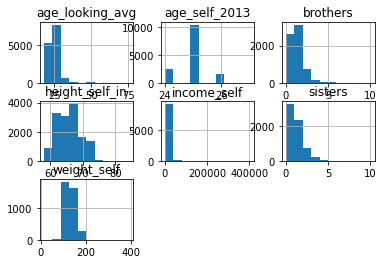

In [213]:
train_set.hist()

When we plot the data, we see long tails for most columns, except for `height_self_in` and `weight_self`, which more closely resemble a normal distribution. There are only three ages in the dataset (which makes sense since that is what the dataset is filtered on).

When we look at the correlation matrix for the training data, it's hard to see an obvious relationship between any of the variables, except for `height_self_in`, `weight_self`, and `age_self_2013`, which makes sense.

There seems to be a little bit of a negative relationship beteween `age_looking_avg` and several of the variables, suggesting that people who are looking for an older partner tend to be shorter and younger and lighter (and possibly female?).

<AxesSubplot:>

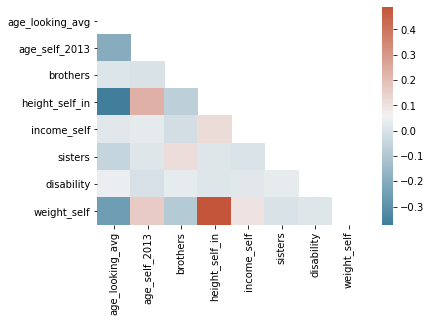

In [248]:
corr_matrix = train_set.corr()
# Create a diverging palette, a mask to hide half the data, and the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap)

## Step 6: Apply transformations to your data